In [1]:
import pandas as pd
import numpy as np
import os
import dask
import dask.dataframe as dd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
import plotly.express as px


# # Display all cell outputs
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

In [2]:
! pip install plotly==5.7.0

In [3]:
Shopping_Dec = pd.read_csv('2019-Dec.csv')

In [4]:
Shopping_Dec.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [5]:
Shopping_Dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB


In [6]:
Shopping_Dec.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [7]:
# get the number of missing data points per column
missing_values_count = Shopping_Dec.isnull().sum()
missing_values_count

event_time             0
event_type             0
product_id             0
category_id            0
category_code    3474821
brand            1510289
price                  0
user_id                0
user_session         779
dtype: int64

In [8]:
# how many total missing values do we have?
total_cells = np.product(Shopping_Dec.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

15.679106267272639

In [9]:
#Since the category_code has many data missing, I am dropping the column as it won't help in visualization
sd = Shopping_Dec.drop('category_code',1)
sd.head() 

/var/folders/ky/rq7qfvdj3fj7j413nz59p_x40000gn/T/ipykernel_37809/3250919883.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [10]:
#Remove rows which do not have brand data
sdb = sd.dropna(subset=['brand'])


In [11]:
# just how much data did we lose?
print("rows in original dataset: %d \n" % Shopping_Dec.shape[0])
print("rows with na's dropped in brand column: %d" % sdb.shape[0])

rows in original dataset: 3533286 

rows with na's dropped in brand column: 2022997


In [12]:
sdb.describe(include=[np.number])

,product_id,category_id,price,user_id
count,2.022997e+06,2.022997e+06,2.022997e+06,2.022997e+06
mean,5.374024e+06,1.548465e+18,9.916241e+00,5.234102e+08
std,1.517112e+06,1.518112e+17,2.240761e+01,8.474165e+07
min,3.752000e+03,1.487580e+18,0.000000e+00,1.180452e+06
25%,5.734590e+06,1.487580e+18,2.060000e+00,4.880967e+08
50%,5.809912e+06,1.487580e+18,4.220000e+00,5.581789e+08
75%,5.856193e+06,1.487580e+18,7.300000e+00,5.831038e+08
max,5.917177e+06,2.235524e+18,3.277800e+02,5.954143e+08


<AxesSubplot:>

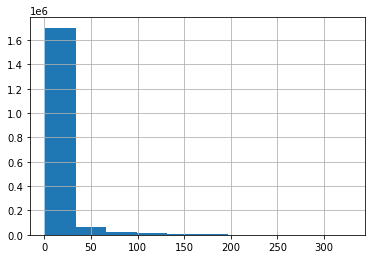

In [42]:
sdb1= sdb.copy(deep=True)
sdb1 = sdb1[sdb1['price'] >=1]
sdb1.price.hist()


In [29]:
#Since there are 18 tabs with price 0. It seems that is error cell so I am dropping them
sdb1.shape[0]

1820102

In [44]:
sdb1.head()

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
5,2019-12-01 00:00:09 UTC,view,5773361,1487580005134238553,runail,2.62,560109803,38cf4ba1-4a0a-4c9e-b870-46685d105f95
7,2019-12-01 00:00:22 UTC,view,5807805,1487580005713052531,ingarden,4.44,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [48]:
#User session missing values, replace them with not available
sdb2 = sdb1.copy(deep=True)
sdb2 = sdb2.replace({'user_session': None}) #replace Nan values with 'None' text

In [49]:
#checking number of unique values in dataframe
sdb2.nunique()

event_time      1136781
event_type            4
product_id        24207
category_id         395
brand               252
price              1596
user_id          262392
user_session     539443
dtype: int64

In [50]:
sdb2.event_type.unique()
#understand the data in event as it will help us visualize the product funnel


array(['remove_from_cart', 'view', 'cart', 'purchase'], dtype=object)

In [51]:
#Since there are 4 event types, we will understand the data in each event type to ideate the funnel for purcheses and remove from cart (abandon cart)
#grouping and preparing data for funnel visualisation

data_funnel=sdb2[sdb2['event_type']!='remove_from_cart'].groupby(['event_type'],as_index=False)['event_time'].count()
data_funnel.columns=['event_type','# events']
data_funnel.sort_values('# events', inplace=True,ascending=False)
data_funnel.reset_index(drop=True,inplace=True)
data_funnel['percent']=data_funnel['# events']/(data_funnel['# events'][0].sum())*100
data_funnel

,event_type,# events,percent
0,view,948181,100.000000
1,cart,441379,46.550079
2,purchase,103065,10.869760


In [164]:
#grouping and preparing data for funnel visualisation

data_funnel1=sdb2[sdb2['event_type']!='purchase'].groupby(['event_type'],as_index=False)['event_time'].count()
data_funnel1.columns=['event_type','# events']
data_funnel1.sort_values('# events', inplace=True,ascending=False)
data_funnel1.reset_index(drop=True,inplace=True)
data_funnel1['percent']=data_funnel1['# events']/(data_funnel1['# events'][0].sum())*100
data_funnel1

,event_type,# events,percent
0,view,948181,100.000000
1,cart,441379,46.550079
2,remove_from_cart,327477,34.537393


In [58]:
#plotly to visualise funnel
fig = go.Figure(go.Funnel(
    y = data_funnel["event_type"],
    x = data_funnel["# events"],
    customdata=data_funnel["percent"],
    texttemplate= "<b>%{label}: </B>%{value:.2s}"+"<br><b>% of Total:</b> %{customdata:.2f}%",
    textposition='inside',
    marker = {"color": ["darkgreen", "lightgreen", "yellow"]}
    ))
fig.update_yaxes(visible=False)
fig.update_layout(template='simple_white',     
                  title={'xanchor': 'center',
                         'yanchor': 'top',        
                         'y':0.9,
                         'x':0.5,
                         'text':"Customer Funnel for Purchase Journey for conversion "})
fig.show()

In [165]:
#plotly to visualise funnel of abandon cart #check % data last tab
fig1 = go.Figure(go.Funnel(
    y = data_funnel1["event_type"],
    x = data_funnel1["# events"],
    customdata=data_funnel1["percent"],
    texttemplate= "<b>%{label}: </B>%{value:.2s}"+"<br><b>% of Total:</b> %{customdata:.2f}%",
    textposition='inside',
    marker = {"color": ["darkblue", "lightblue", "skyblue"]}
    ))
fig1.update_yaxes(visible=False)
fig1.update_layout(template='simple_white',     
                  title={'xanchor': 'center',
                         'yanchor': 'top',        
                         'y':0.9,
                         'x':0.5,
                         'text':"Customer Funnel for Abandon Cart"})
fig1.show()

In [65]:
#After looking at the funnel we have 11% conversion rate and 35% abandon cart rate so we need to improve conversion rate for this year's holiday campiagn.

#After analysing the brand and its data we realised that we want to undertand the 'What are trends in the holiday season?' 

#We would try to understand the most popular brands, categories and prices of products so those can be used in future campaign to imporve conversion and reduce "remove from cart"

#brand based spending understanding starts with understanding total nummber of brands and brands with highest customers
brand1 = sdb2['brand'].value_counts()
print(brand1)

runail       195820
grattol      155920
masura       125163
irisk        118974
estel         71976
              ...  
voesh             3
ibd               1
macadamia         1
shifei            1
dessata           1
Name: brand, Length: 252, dtype: int64


In [66]:
fig = go.Figure(data=[go.Histogram(x=brand1[1:],nbinsx=10, histnorm='probability')])
fig.update_layout(
    title_text='Brand Frequency', # title of plot
    xaxis_title_text='Brand Appearance Frequency', # xaxis label
    yaxis_title_text='Percentage', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    #bargroupgap=0.1 # gap between bars of the same location coordinates
)

In [72]:
#93.9% of mentioned brands are refered under 20k times while the brand with top apprearance 
#up to 80000 times, almost 8 times more than regular brand. 
#As a result, we will do more analysis how top few brands of all brands make a diffirent to be 
#mentioned/considered more during purchase decision process.
# create a list of brands (different from Not available) mentioned more than 40000 times as from the histogram, it would show all top brands
brand_list = brand1[1:][brand >= 40000].index 
# filter out a list of rows with brands in top 10 brands
best_brands = sdb2[sdb2['brand'].isin(brand_list)]

In [73]:
len(brand_list) # count top brands

10

In [120]:
best_brands

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
7,2019-12-01 00:00:22 UTC,view,5807805,1487580005713052531,ingarden,4.44,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
18,2019-12-01 00:00:52 UTC,cart,5761411,1487580007432717250,ingarden,2.86,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
19,2019-12-01 00:00:58 UTC,cart,5761411,1487580007432717250,ingarden,2.86,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
23,2019-12-01 00:01:11 UTC,view,5849033,1487580005092295511,uno,10.32,562651624,f8783526-2382-454b-b417-fa48d371030f
35,2019-12-01 00:01:51 UTC,view,5859489,1487580005671109489,masura,1.73,521863546,50040a3b-8a81-483d-b0e8-8152821701f8
...,...,...,...,...,...,...,...,...
3533263,2019-12-31 23:57:28 UTC,view,5809910,1602943681873052386,grattol,5.24,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3533266,2019-12-31 23:57:40 UTC,view,5770050,1487580013841613016,kapous,2.81,591554753,77cb298e-6f3e-4917-aeb4-f08b713115e1
3533268,2019-12-31 23:57:48 UTC,view,5809910,1602943681873052386,grattol,5.24,588166646,e099adca-fec5-4aef-820f-6116836e322a
3533269,2019-12-31 23:57:50 UTC,view,5700842,1487580013489291461,irisk,1.43,589812770,be41f181-5de7-8271-70b0-8f492a4ed843


In [77]:
brand_list

Index(['grattol', 'masura', 'irisk', 'estel', 'kapous', 'ingarden',
       'bpw.style', 'jessnail', 'pole', 'uno'],
      dtype='object')

In [75]:
#Top 10 brands funnel would be visualised to understand the purchase behaviour from those brands
#Let us get the data ready for the funnel
data_funnel=sdb2[sdb2['event_type']!='remove_from_cart'].groupby(['event_type'],as_index=False)['event_time'].count()
data_funnel.columns=['event_type','# events']
data_funnel.sort_values('# events', inplace=True,ascending=False)
data_funnel.reset_index(drop=True,inplace=True)
data_funnel['percent']=data_funnel['# events']/(data_funnel['# events'][0].sum())*100
data_funnel

,event_type,# events,percent
0,view,948181,100.000000
1,cart,441379,46.550079
2,purchase,103065,10.869760


In [98]:
fig = go.Figure()
for i in range(len(brand_list)):
    name = brand_list[i]
    data_funnel = best_brands[best_brands['brand']==name]['event_type'].value_counts()
    data_funnel = data_funnel.drop('remove_from_cart')

    fig.add_trace(go.Funnel(
        name = name,
        y = data_funnel.index,
        x = data_funnel,
        orientation = "h",
        textposition = "inside",
        textinfo = "value+percent initial"))

fig.update_layout(
    title_text='Customer behavior statistic for 10 most-popular brand', # title of plot
    yaxis_title_text='Customer behavior', # xaxis label
    xaxis_title_text='Brand performance', # yaxis label
    )


In [ ]:
#From the above funnel we understand conversion rate of different brands
#From the above funnel we can understand that bwp.style with 32% and ingarden with 24% brand has highest conversion rate once added to cart
#bwp.style is one of the best performing brands in the funnel which has led to purchases


<AxesSubplot:xlabel='price', ylabel='brand'>

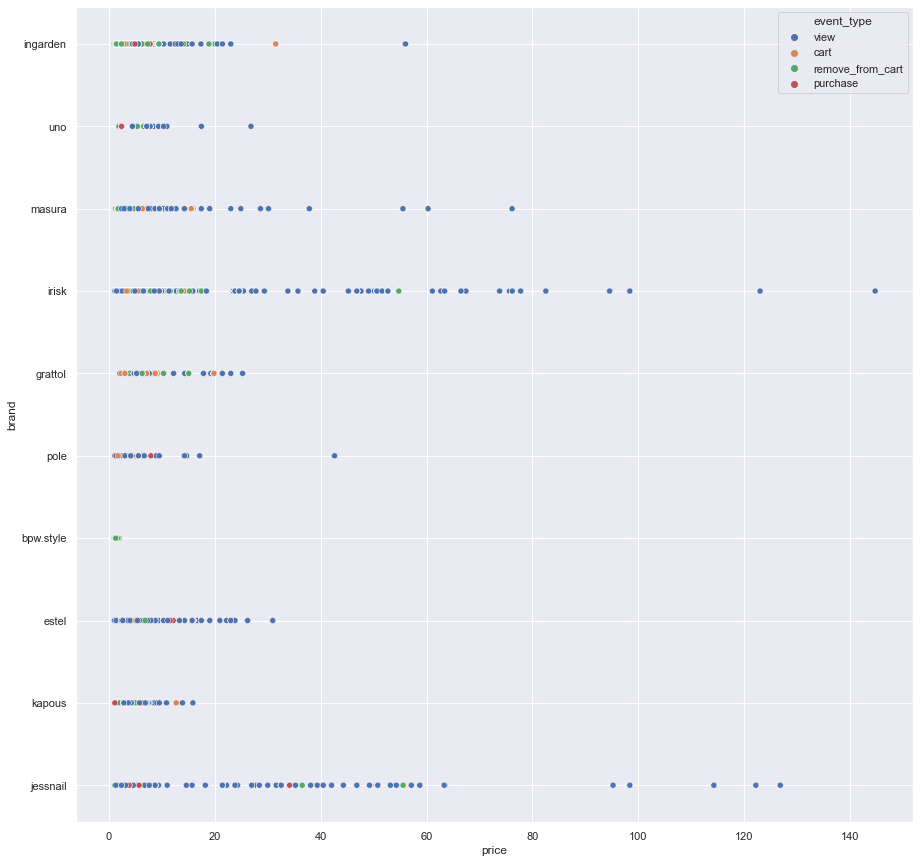

In [148]:
#Understannding the prices of these brands products
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,15)})
sns.scatterplot(data = best_brands, x = 'price', y = "brand", hue = "event_type")

In [ ]:
#From the scatter plot above we undertsand that most purchases have happened for most popular brands under $40 and majority under $20 

/Users/hiloni/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Count')

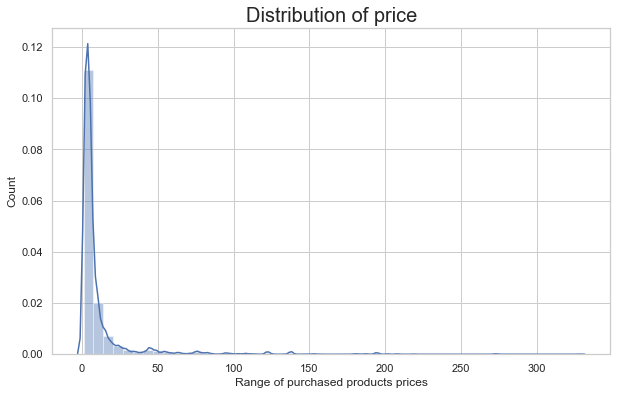

In [159]:
#Unnderstanding that
purchases = sdb1.copy()
purchases = purchases[purchases.event_type=='purchase']
#plt.figure(figsize=(5,10))
#plt.scatter(purchases['event_type'], purchases['price'], s=1)
#plt.xticks(np.arange(min(purchases['event_type']), max(purchases['event_type'])+1, 1.0))
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(sdb1['price'])
plt.title('Distribution of price of purchased products ', fontsize = 20)
plt.xlabel('Range of purchased products prices')
plt.ylabel('Count')

In [82]:
#category based spending understanding starts with understanding total nummber of category and category with highest customers
category1 = sdb2['category_id'].value_counts()
print(category1)

1602943681873052386    117336
1487580005671109489     98760
1487580007675986893     88457
1487580005092295511     77118
1487580013841613016     71506
                        ...  
1487580008951054345         1
1487580008674231292         1
1487580009009774604         1
1487580006744851367         1
1487580012851757223         1
Name: category_id, Length: 395, dtype: int64


In [ ]:
#From the above graph we understand that most purchased products are under $7 

In [84]:
fig3 = go.Figure(data=[go.Histogram(x=category1[1:],nbinsx=10, histnorm='probability')])
fig3.update_layout(
    title_text='category_id Frequency', # title of plot
    xaxis_title_text='category Appearance Frequency', # xaxis label
    yaxis_title_text='Percentage', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    #bargroupgap=0.1 # gap between bars of the same location coordinates
)

In [91]:
#As we can see most catgory are distributed upto 20k and there are very few above 20k so we will consider those categories above 20k as top performing
category_list = category1[1:][category1 >= 20000].index 
# filter out a list of rows with  in top categories
best_categories = sdb2[sdb2['category_id'].isin(category_list)]
category_list

Int64Index([1487580005671109489, 1487580007675986893, 1487580005092295511,
            1487580013841613016, 1487580006300255120, 1487580008246412266,
            1487580005134238553, 1638456119066100510, 1487580005713052531,
            1487580005268456287, 1487580005461394279, 1487580008145748965,
            1487580005050352469, 1487580006317032337, 1487580006350586771],
           dtype='int64')

In [92]:
len(category_list) # count top categories

15

In [93]:
#Top 15 categories funnel would be visualised to understand the purchase behaviour from those brands
#Let us get the data ready for the funnel
data_funnel=sdb2[sdb2['event_type']!='remove_from_cart'].groupby(['event_type'],as_index=False)['event_time'].count()
data_funnel.columns=['event_type','# events']
data_funnel.sort_values('# events', inplace=True,ascending=False)
data_funnel.reset_index(drop=True,inplace=True)
data_funnel['percent']=data_funnel['# events']/(data_funnel['# events'][0].sum())*100
data_funnel

,event_type,# events,percent
0,view,948181,100.000000
1,cart,441379,46.550079
2,purchase,103065,10.869760


In [117]:
sdb2["category_id"]=sdb2["category_id"].astype(str)
sdb2["category_id"]

0          1487580005268456287
1          1487580005411062629
2          1487580009471148064
5          1487580005134238553
7          1487580005713052531
                  ...         
3533272    1783999064136745198
3533275    1487580007281722301
3533280    2151191070908613477
3533281    1487580005671109489
3533282    1487580013388628160
Name: category_id, Length: 1820102, dtype: object

In [118]:
category_list = category_list.astype(str)
category_list

Index(['1487580005671109489', '1487580007675986893', '1487580005092295511',
       '1487580013841613016', '1487580006300255120', '1487580008246412266',
       '1487580005134238553', '1638456119066100510', '1487580005713052531',
       '1487580005268456287', '1487580005461394279', '1487580008145748965',
       '1487580005050352469', '1487580006317032337', '1487580006350586771'],
      dtype='object')

In [119]:
best_categories = best_categories.astype(str)
best_categories

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
5,2019-12-01 00:00:09 UTC,view,5773361,1487580005134238553,runail,2.62,560109803,38cf4ba1-4a0a-4c9e-b870-46685d105f95
7,2019-12-01 00:00:22 UTC,view,5807805,1487580005713052531,ingarden,4.44,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
8,2019-12-01 00:00:27 UTC,view,5588608,1487580008145748965,roubloff,5.4,546170008,676d9fcc-2a4f-4448-b49d-136f2e4208c1
22,2019-12-01 00:01:02 UTC,view,5706778,1487580005268456287,beautix,14.13,564257889,a4248817-8d0d-4dac-96e6-a586563308de
...,...,...,...,...,...,...,...,...
3533226,2019-12-31 23:54:50 UTC,view,5854573,1487580006350586771,jessnail,46.83,584900297,191a4251-e99c-4dc9-87ee-295107387d58
3533239,2019-12-31 23:55:52 UTC,view,5696330,1487580013841613016,estel,2.62,595413843,468fcf5a-56d4-4ec2-a73e-5403256fdd22
3533240,2019-12-31 23:56:00 UTC,view,5859416,1487580005671109489,masura,2.37,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b
3533266,2019-12-31 23:57:40 UTC,view,5770050,1487580013841613016,kapous,2.81,591554753,77cb298e-6f3e-4917-aeb4-f08b713115e1


Text(0.5, 1.0, ' category vs price')

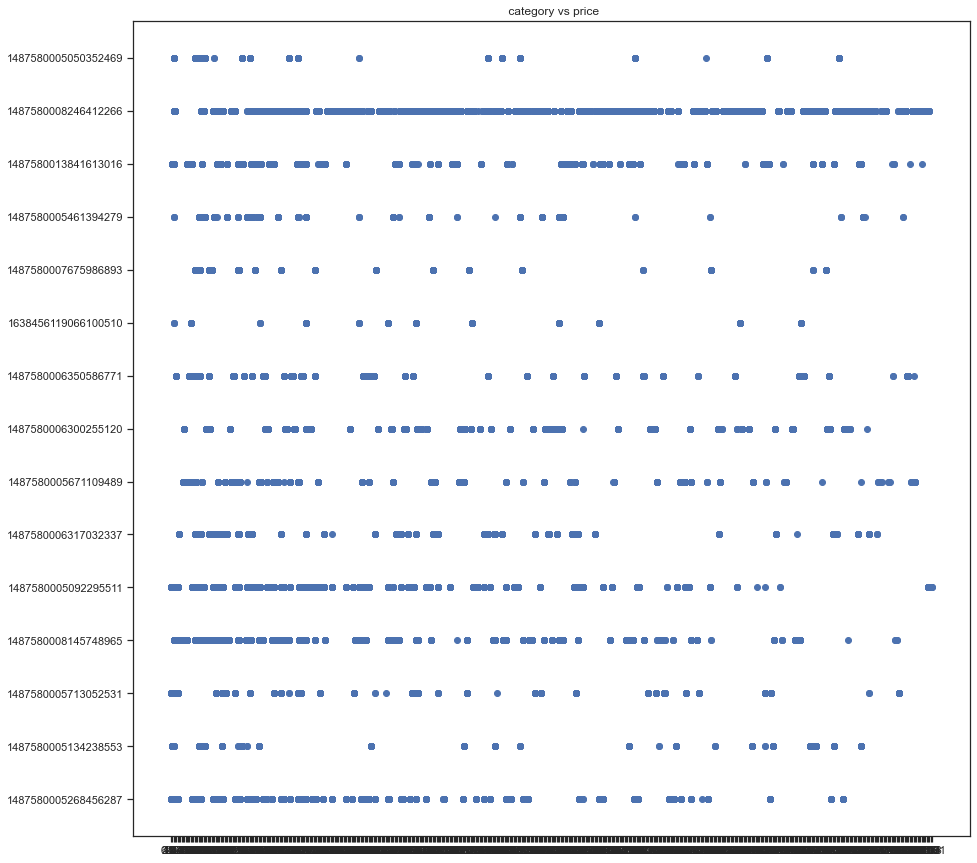

In [172]:
#Category_id distribution per year
#type_count = best['category_id'].value_counts()
#for i in range(len(category_list)):
#name2 = category_list[i]
plt.scatter(best_categories.price,best_categories.category_id)
plt.title(' category vs price')

In [ ]:
#From the scatter plot we understand that the corelation between category_id and price is not easy to determine so we only consider category _id for our campaigns

In [132]:
for i in range(len(category_list)):
    name2 = category_list[i]
data_funnel2 = sdb2[sdb2['category_id']==name2]['price']
data_funnel2

90          47.46
112         79.21
138         63.33
627         79.21
816        102.38
            ...  
3532123      2.38
3532309     59.52
3533061     21.43
3533221     46.83
3533226     46.83
Name: price, Length: 23085, dtype: float64

In [173]:
#Recommendations: These would help identify "what" to show in our ad cammpaigns and on our landing page to improve conversion
#1. For the marketing campaign this year, company should focus on promoting the top 10 bestselling brands on their homepage and specifically bpw.style as it has highest conversion rate
#2. Some of the products brand should promote should be under the price range of $7 as their most purchases have been under $7
#3. Some of the most popular categories of the 15 category_list as per category_id should be used in the marketing campaign as they will fetch more customers entering the funnel and beased on conversion ratio of the categories_id we can detemine which ones to show during view campaigns and remarketing campaigns